Available scalar tags: ['Loss/Episode', 'Loss/Actor Loss', 'Loss/Critic Loss', 'Performance/Entropy', 'Performance/Total Reward', 'Performance/Episode Length']

--- [1] Actor Loss (first 100 values) ---
001. Step: 1, Value: 0.119223
002. Step: 2, Value: 0.020910
003. Step: 3, Value: 0.134398
004. Step: 4, Value: 0.000031
005. Step: 5, Value: -0.002180
006. Step: 6, Value: 0.017148
007. Step: 7, Value: -0.130213
008. Step: 8, Value: -0.003016
009. Step: 9, Value: -0.068641
010. Step: 10, Value: -0.129545
011. Step: 11, Value: -0.084242
012. Step: 12, Value: -0.044313
013. Step: 13, Value: 0.000117
014. Step: 14, Value: 0.082565
015. Step: 15, Value: -0.111316
016. Step: 16, Value: -0.097699
017. Step: 17, Value: 0.073683
018. Step: 18, Value: 0.054304
019. Step: 19, Value: 0.047512
020. Step: 20, Value: -0.030648
021. Step: 21, Value: 0.144165
022. Step: 22, Value: 0.017356
023. Step: 23, Value: 0.074087
024. Step: 24, Value: 0.050375
025. Step: 25, Value: -0.039854
026. Step: 26, Value

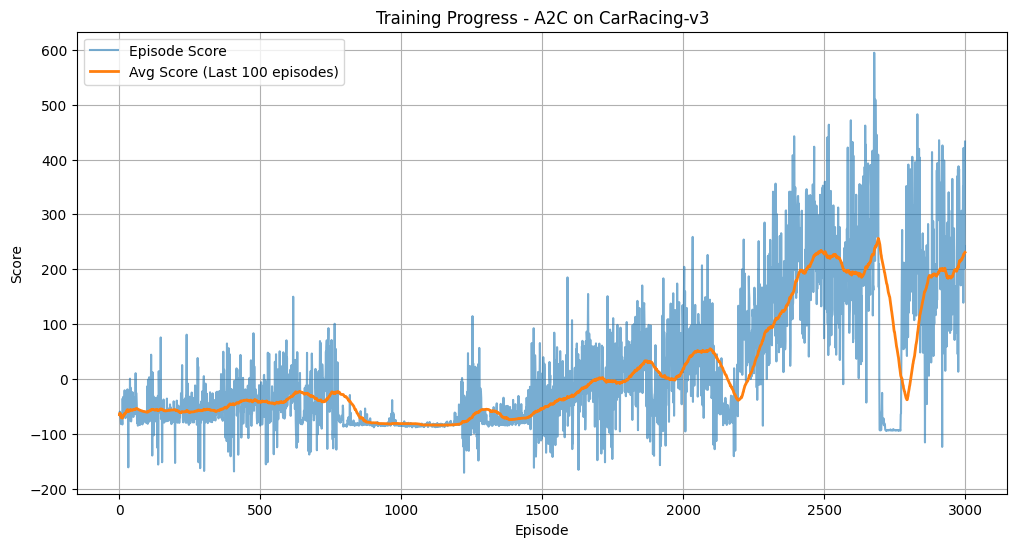

In [4]:
from tensorboard.backend.event_processing import event_accumulator
import numpy as np
import matplotlib.pyplot as plt
# Nên dùng raw string để tránh lỗi escape
ea = event_accumulator.EventAccumulator(r'E:\Car Racing_A2C\jerrykal githuub ppo\plot_a2c\events.out.tfevents.1743962885.DESKTOP-SG2V05K.19756.0')
ea.Reload()

# In để kiểm tra xem tag có tồn tại
print("Available scalar tags:", ea.Tags()["scalars"])

# Lấy dữ liệu từ tag Total Reward
reward_events = ea.Scalars('Performance/Total Reward')
actor_loss = ea.Scalars('Loss/Actor Loss')
critic_loss = ea.Scalars('Loss/Critic Loss')
total_loss = ea.Scalars('Loss/Episode')
ent = ea.Scalars('Performance/Entropy')

print("\n--- [1] Actor Loss (first 100 values) ---")
for i, e in enumerate(actor_loss[:100], 1):
    print(f"{i:03d}. Step: {e.step}, Value: {e.value:.6f}")

print("\n--- [2] Critic Loss (first 100 values) ---")
for i, e in enumerate(critic_loss[:100], 1):
    print(f"{i:03d}. Step: {e.step}, Value: {e.value:.6f}")

print("\n--- [3] Total Loss (Episode) (first 100 values) ---")
for i, e in enumerate(total_loss[:100], 1):
    print(f"{i:03d}. Step: {e.step}, Value: {e.value:.6f}")

print("\n--- [4] Entropy (first 100 values) ---")
for i, e in enumerate(ent[:100], 1):
    print(f"{i:03d}. Step: {e.step}, Value: {e.value:.6f}")

# In toàn bộ step và reward
score_history = []
avg_score_history = []
for e in reward_events:
    score_history.append(e.value)
    avg_score = np.mean(score_history[-100:])
    avg_score_history.append(avg_score)

# --- Plotting ---
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(score_history) + 1), score_history, label='Episode Score', alpha=0.6)
plt.plot(np.arange(1, len(avg_score_history) + 1), avg_score_history, label='Avg Score (Last 100 episodes)', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Training Progress - A2C on CarRacing-v3')
plt.legend()
plt.grid(True)
plt.savefig(f'a2c_carracing_training_plot.png')
print(f"Training plot saved as a2c_carracing_training_plot.png")
plt.show()
